In [305]:
# Setup
import matplotlib
import numpy as np
import scipy as sp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd
import ggplot
%matplotlib inline

In [306]:
# Start an inference server

from venture.shortcuts import *
v = make_church_prime_ripl()
# x = Puma().make_church_prime_ripl()

In [307]:
# Forget everything

v.clear()

In [308]:
# # Specify model 1

# v.assume("offset_1", "(uniform_continuous -1 1)")
# v.assume("offset_2", "(uniform_continuous -1 1)")
# v.assume("linear", "(flip 0.5)")
# v.assume("beta_1", "(if linear (uniform_continuous -1 1) 0)")
# v.assume("quadratic", "(flip 0.5)")
# v.assume("beta_2", "(if quadratic (uniform_continuous -1 1) 0)")
# v.assume("noise_sd", "(exp (normal 0 2))")

# v.assume("f_1", "(lambda (x) (+ offset_1 (* beta_1 x) (* beta_2 x x)))")
# v.assume("f_2", "(lambda (x) (+ offset_2 (* beta_1 x) (* beta_2 x x)))")

# v.assume("cluster_membership", "(mem (lambda (index) (if (flip) 1 2)))")

# v.assume("f", "(lambda (x index) (if (eq (cluster_membership index) 1) (f_1 x) (f_2 x)))")

In [309]:
# Specify model 2

# v.assume("cluster_membership_crp", "(make_sym_dir_mult 1 2)")
v.assume("cluster_membership_crp", "(make_crp 0.5)")
v.assume("cluster_membership", "(mem (lambda (index) (cluster_membership_crp)))")
# v.assume("cluster_membership", "(mem (lambda (index) (if (flip) 0 1)))")

v.assume("offset", "(mem (lambda (cluster_index) (uniform_continuous -20 50)))")
v.assume("beta", "(normal 1.5 5)")
v.assume("noise_sd", "(+ 0.1 (exp (normal 0 2)))")

v.assume("f", "(lambda (x index) (+ (offset (cluster_membership index)) (* beta x)))")

'<procedure>'

In [310]:
v.sample('(cluster_membership 0)')

1

In [311]:
# Start inference

# v.start_continuous_inference()

In [312]:
# Create data

# X_1 = np.random.gamma(1, 1, 20)
# Y_1 = -0.4 + 0.5 * X_1 + 0.0 * X_1 * X_1
# Y_1 += 0.5 * np.random.randn(*X_1.shape)

# X_2 = np.random.gamma(1, 1, 10)
# Y_2 = +3 + 0.5 * X_2
# Y_2 += 0.5 * np.random.randn(*X_2.shape)

# X_3 = np.random.gamma(1, 1, 25)
# Y_3 = +0.7 + 0.5 * X_3
# Y_3 += 0.5 * np.random.randn(*X_3.shape)

# X = np.concatenate((X_1, X_2, X_3))
# Y = np.concatenate((Y_1, Y_2, Y_3))

In [313]:
# Read in CSV data

mydata = pd.read_csv("for_python.csv", header=0) #python starts counting at zero
X = mydata['mynewdata.FAI']
Y = mydata['mynewdata.AQ']


In [314]:
# Observe data

for index, (x, y) in enumerate(zip(X, Y)):
    v.observe("(normal (f %f %d) noise_sd)" % (x, index), y)
    index += 1

In [315]:
# v.sample("(cluster_membership 0)")

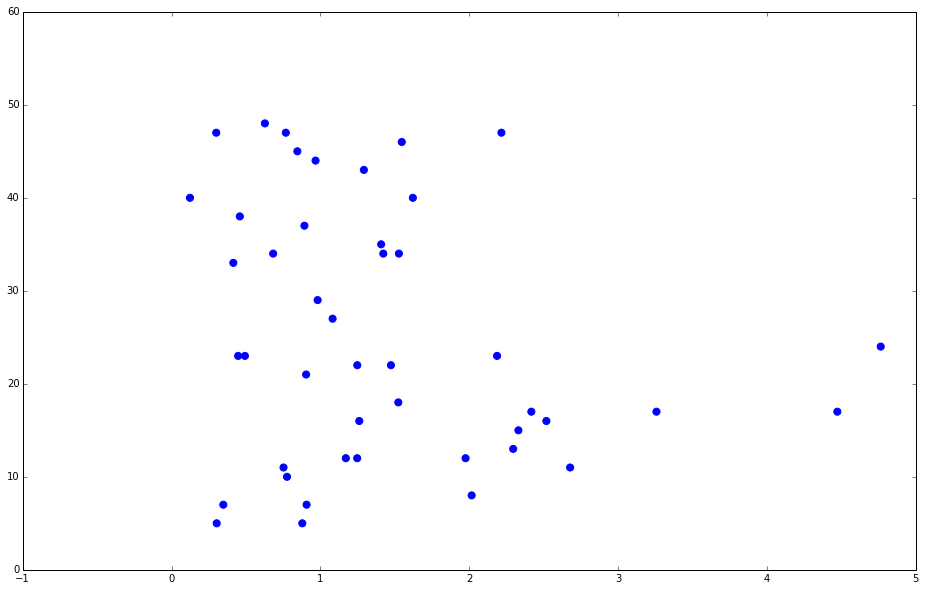

In [316]:
# Sample the parameters and draw a picture

# Only necessary if not running continuous inference
v.infer(5000)

# sample = v.sample("(list offset_1 offset_2 beta_1 beta_2 noise_sd)")
# offset_1 = sample[0]
# offset_2 = sample[1]
# beta_1 = sample[2]
# beta_2 = sample[3]
# noise_sd = sample[4]

# beta = v.sample("beta_1")
# offset_1 = v.sample("(offset 0)")
# offset_2 = v.sample("(offset 1)")

fig, ax = plt.subplots(figsize=(16, 10))
plt.clf()

cluster_memberships = v.sample('(list ' + ' '.join('(cluster_membership %d)' % index
                                                   for index in range(len(X))) + ')')
cluster_numbers = np.unique(cluster_memberships)
canonical_cluster_memberships = np.zeros(len(cluster_memberships))
for i, value in enumerate(cluster_numbers):
    canonical_cluster_memberships[cluster_memberships==value] = i
cluster_memberships = canonical_cluster_memberships

for (cluster_index, x, y) in zip(cluster_memberships, X, Y):
#     cluster_index = v.sample("(cluster_membership %d)" % index)
#     y_hat = v.sample("(f (0 0))")# % (x, index))
#     print(cluster_index)
    if cluster_index == 0:
        color = 'b'
    elif cluster_index == 1:
        color = 'r'
    elif cluster_index == 2:
        color = 'm'
    elif cluster_index == 3:
        color = 'c'
    else:
        color = 'k'
    plt.scatter(x, y, color=color, s=50)

# plt.scatter(X, Y, color='r', s=50)
# plt.scatter(X_2, Y_2, color='b', s=50)
# plot_x = np.linspace(min(X), max(X), 100)
# # plt.plot(plot_x, offset_1 + beta * plot_x, ls='-', color='g', lw=5)
# # plt.plot(plot_x, offset_2 + beta * plot_x, ls='-', color='g', lw=5)

# plt.show()

In [317]:
cluster_memberships

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [318]:
# # Sample in a loop to get distribution

# samples = list()

# for i in range(100):
    
# #     print(i)
    
#     v.infer(50)

#     sample = v.sample("(list offset beta_1 beta_2 noise_sd linear quadratic)")
#     offset = sample[0]
#     beta_1 = sample[1]
#     beta_2 = sample[2]
#     noise_sd = sample[3]
#     linear = sample[4]
#     quadratic = sample[5]
    
#     samples.append(linear)
    
# fig, ax = plt.subplots(figsize=(16, 10))
# plt.clf()

# plt.hist(samples)

# plt.show()

In [319]:
# Stop inference

# v.stop_continuous_inference()

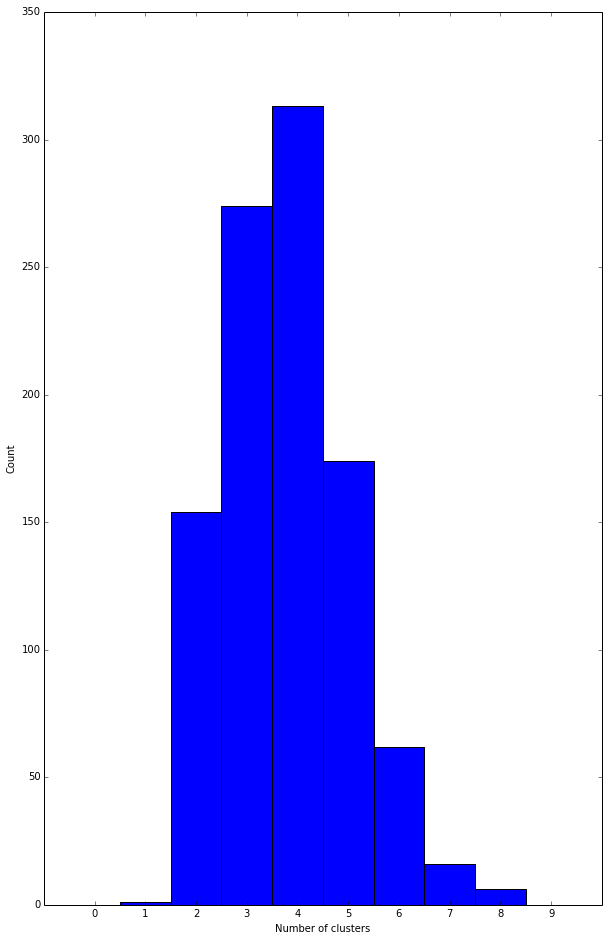

In [320]:
# Sample the parameters and draw a picture

cluster_iterations = 1000
samples = list()

for _ in range(cluster_iterations):

    v.infer(1000)

    cluster_memberships = v.sample('(list ' + ' '.join('(cluster_membership %d)' % index
                                                       for index in range(len(X))) + ')')
    cluster_numbers = np.unique(cluster_memberships)
    
    samples.append(len(cluster_numbers))


# Plot using matplotlib - histograms for ggplot were unreliable due to strange decision making for binning

# Instead of using histogram, use bar chart after calling np.bincount - more flexible for graphic making
counts = np.bincount(samples)  


plt.clf()
fig, ax = plt.subplots(figsize=(10,16))
ax.bar(range(len(counts)), height=counts, width=1, align='center')
ax.set(xticks=range(10), xlim=[-1, 10])
plt.xlabel('Number of clusters')
plt.ylabel('Count')
# plt.savefig('cluster_num_hist.pdf') # must come before plt.show
plt.show()



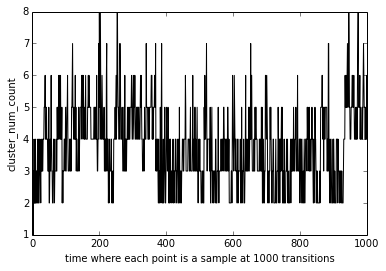

<ggplot: (8727601264865)>


In [321]:
# Try to get a "trace" of number of clusters
df_cluster = pd.DataFrame(samples,  columns=['cluster_num_count'])

t = range(1,(cluster_iterations+1))

df_cluster['t'] = t

# Write this trace to file
import os.path


def next_cluster_file_name():
    num = 1
    while True:
        file_name = 'cluster_trace%d.csv' % num
        if not os.path.exists(file_name):
            return file_name
        num += 1


df_cluster.to_csv(next_cluster_file_name())

# print(df)

trace = ggplot.ggplot(ggplot.aes(x='t', y='cluster_num_count'), data=df_cluster)
trace = (trace + ggplot.geom_line()+ ggplot.theme_matplotlib() + 
ggplot.xlab("time where each point is a sample at 1000 transitions"))

print(trace)


          ACF  lagsize
0    0.543595        1
1    0.442194        2
2    0.389514        3
3    0.348617        4
4    0.328644        5
5    0.306144        6
6    0.273536        7
7    0.245510        8
8    0.217733        9
9    0.214014       10
10   0.219430       11
11   0.179733       12
12   0.171700       13
13   0.165564       14
14   0.162982       15
15   0.185540       16
16   0.147819       17
17   0.154036       18
18   0.140285       19
19   0.116256       20
20   0.144597       21
21   0.099801       22
22   0.084782       23
23   0.080245       24
24   0.080208       25
25   0.080449       26
26   0.091243       27
27   0.086785       28
28   0.114429       29
29   0.097272       30
..        ...      ...
473 -0.073597      474
474 -0.040699      475
475  0.010198      476
476  0.005382      477
477  0.041268      478
478  0.069627      479
479  0.085028      480
480  0.081343      481
481  0.025380      482
482  0.034696      483
483  0.007655      484
484 -0.0399

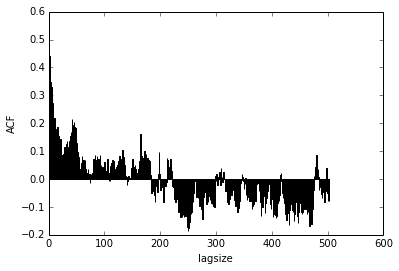

<ggplot: (8727600752309)>
Effective Sample Size
51.100370506


In [322]:
# Autocorrelation

ACF = []
for lag in range(1,(cluster_iterations/2+4)):
    result = []
    for row in range(lag,cluster_iterations): # Can't be more than the number of sample points taken
        result.append(df_cluster.ix[row,"cluster_num_count"])
    original = samples[:-lag]
    ACF.append(sp.stats.spearmanr(original,result))
    
# Returns a list of tuples of ACF values for lags in range

ACF = [x[0] for x in ACF]

s0 = pd.Series(ACF, name='ACF')

lagsize = range(1,cluster_iterations)
s1 = pd.Series(range(1,cluster_iterations), name='lagsize')

newdf = pd.DataFrame(s0, columns=["ACF"])
newdf['lagsize'] = s1

print(newdf)

x = ggplot.ggplot(ggplot.aes(x='lagsize', y='ACF'), data=newdf)
x = (x + ggplot.geom_bar(stat="bar")+ggplot.theme_matplotlib())

print(x)

# Effective sample size
last_k =[ n for n,i in enumerate(ACF) if i<0.05 ][0]
ACF_k = ACF[0:last_k]
print('Effective Sample Size')
print(cluster_iterations/(1+(2*sum(ACF_k))))


In [323]:
# Find median of above
np.median(samples)

4.0

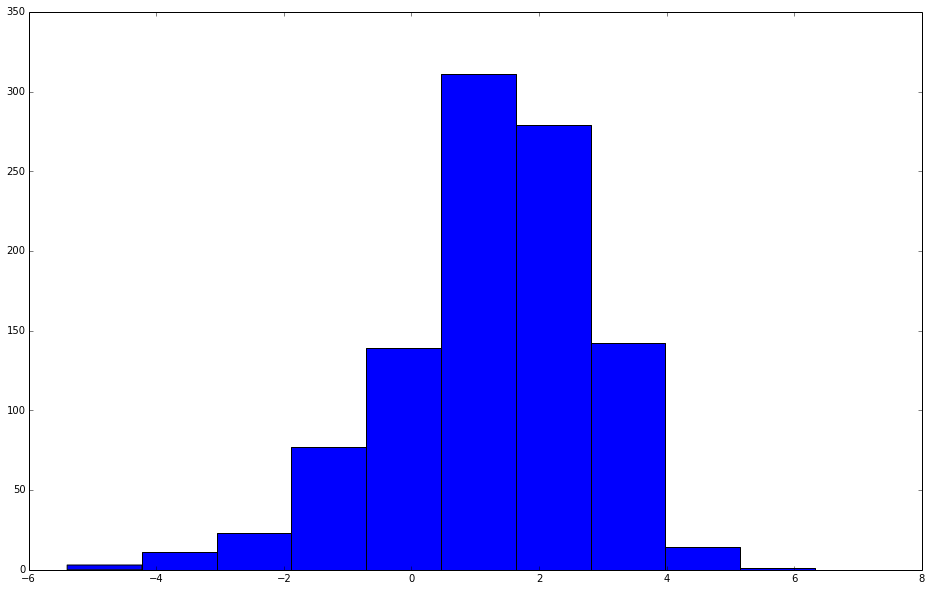

In [324]:
# Sample the parameters and draw a picture

samples = list()
beta_iterations = 1000

for _ in range(beta_iterations):

    v.infer(1000)
    
    param_beta = v.sample('beta')

    samples.append(param_beta)
    
fig, ax = plt.subplots(figsize=(16, 10))
plt.clf()

plt.hist(samples)
plt.savefig("beta_posterior_hist.pdf")
plt.show()

Saving 6.0 x 4.0 in image.


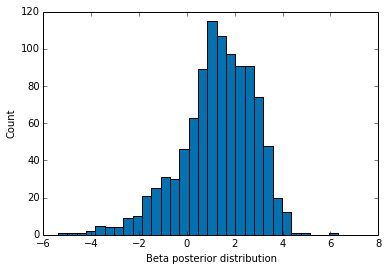

<ggplot: (8727600973457)>


In [325]:
# ggplot
# Relies on list of samples generated from for loop above

df = pd.DataFrame(samples,  columns=['Beta_posterior'])


p = ggplot.ggplot(ggplot.aes(x='Beta_posterior'), data=df)
p = (p + ggplot.geom_histogram(fill='#0072B2') + ggplot.theme_matplotlib() + 
ggplot.xlab("Beta posterior distribution") + ggplot.ylab("Count"))



ggplot.ggsave(p, "beta_posterior_hist.pdf")
print(p)

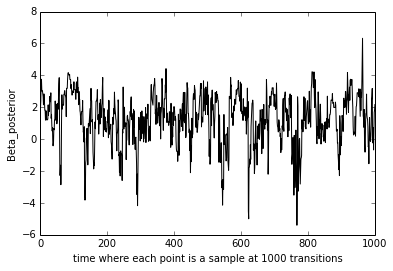

<ggplot: (8727602220265)>


In [326]:
# Try to get a "trace" of beta values

df = pd.DataFrame(samples,  columns=['Beta_posterior'])
t = range(1,(beta_iterations+1))

df['t'] = t

# Write this trace to file

def next_beta_file_name():
    num = 1
    while True:
        file_name = 'beta_trace%d.csv' % num
        if not os.path.exists(file_name):
            return file_name
        num += 1


df.to_csv(next_beta_file_name())




trace = ggplot.ggplot(ggplot.aes(x='t', y='Beta_posterior'), data=df)
trace = (trace + ggplot.geom_line()+ ggplot.theme_matplotlib() + 
ggplot.xlab("time where each point is a sample at 1000 transitions"))

print(trace)



In [327]:
# Sample 95% credible interval for beta values
a = np.percentile(samples, 2.5)
b = np.percentile(samples, 97.5)
print("95% credible interval for beta values")
print(a,b)

# Sample 90% credible interval for beta values
a = np.percentile(samples, 5)
b = np.percentile(samples, 95)
print("90% credible interval for beta values")
print(a,b)

# Sample mean for beta values
c = np.mean(samples)
print("mean of beta values")
print(c)

# Median of beta values
z = np.median(samples)
print("Median of beta values")
print(z)

#Sample standard deviation for beta values
d = np.std(samples)
print("Standard deviation for beta values")
print(d)

# Count values less than 0
f = sum(i < 0 for i in samples)
f = f/1000.
print("posterior falling beneath 0")
print(f)

# Count values greater than 0
g = sum(i > 0 for i in samples)
g = g/1000.
print("posterior falling above 0")
print(g)


95% credible interval for beta values
(-2.2769441990556927, 3.7423676614809716)
90% credible interval for beta values
(-1.5796459989998068, 3.4283250822573006)
mean of beta values
1.27286674896
Median of beta values
1.39469481145
Standard deviation for beta values
1.56494226611
posterior falling beneath 0
0.179
posterior falling above 0
0.821


          ACF  lagsize
0    0.764061        1
1    0.615199        2
2    0.509143        3
3    0.440247        4
4    0.375472        5
5    0.317326        6
6    0.263839        7
7    0.232846        8
8    0.219473        9
9    0.192365       10
10   0.174080       11
11   0.159642       12
12   0.162266       13
13   0.173201       14
14   0.151576       15
15   0.141625       16
16   0.108232       17
17   0.096107       18
18   0.084701       19
19   0.054645       20
20   0.029587       21
21   0.020919       22
22   0.018426       23
23  -0.009365       24
24  -0.009597       25
25  -0.031336       26
26  -0.047553       27
27  -0.064410       28
28  -0.083769       29
29  -0.091965       30
..        ...      ...
969  0.079497      NaN
970  0.108706      NaN
971  0.052727      NaN
972 -0.111102      NaN
973 -0.239876      NaN
974 -0.401800      NaN
975 -0.406160      NaN
976 -0.389813      NaN
977 -0.383987      NaN
978 -0.191844      NaN
979 -0.009025      NaN
980 -0.0860

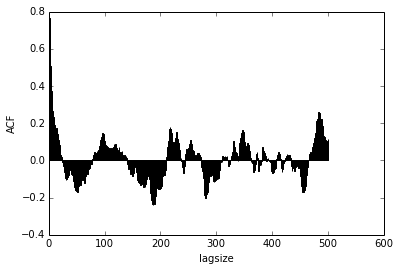

<ggplot: (8727602147017)>


In [328]:
# Autocorrelation

ACF = []
for lag in range(1,beta_iterations):
    result = []
    for row in range(lag,beta_iterations):
        result.append(df.ix[row,"Beta_posterior"])
    original = samples[:-lag]
    ACF.append(sp.stats.pearsonr(original,result))
    
# Returns a list of tuples of ACF values for lags in range

ACF = [x[0] for x in ACF]

s0 = pd.Series(ACF, name='ACF')

lagsize = range(1,501)
s1 = pd.Series(range(1,501), name='lagsize')

newdf = pd.DataFrame(s0, columns=["ACF"])
newdf['lagsize'] = s1

print(newdf)

# Effective sample size
last_k =[ n for n,i in enumerate(ACF) if i<0.05 ][0]
ACF_k = ACF[0:last_k]
print('Effective Sample Size')
print(beta_iterations/(1+(2*sum(ACF_k))))



x = ggplot.ggplot(ggplot.aes(x='lagsize', y='ACF'), data=newdf)
x = (x + ggplot.geom_bar(stat="bar")+ggplot.theme_matplotlib())

print(x)

In [329]:
# Sample cluster assignments - make a list of all the assignments for each sample

samples = list()

for _ in range(1000):

    v.infer(1000)
    
    cluster_memberships = v.sample('(list ' + ' '.join('(cluster_membership %d)' % index
                                                   for index in range(len(X))) + ')')

    cluster_numbers = np.unique(cluster_memberships)

    canonical_cluster_memberships = np.zeros(len(cluster_memberships))
    
    for i, value in enumerate(cluster_numbers):
        canonical_cluster_memberships[cluster_memberships==value] = i
    
    cluster_memberships = canonical_cluster_memberships

    
    samples.append(cluster_memberships)
    
samples = np.array(samples)

# print(samples)

# print(samples.shape) # check to see whether array is correct shape

cluster_labels = np.unique(samples)

co_occurrence_matrix = np.zeros((samples.shape[1], samples.shape[1]))

for label in cluster_labels:
    co_occurrence_matrix += np.dot((samples.T == label) * 1, (samples == label) * 1)
    

# Reshape co-occurence_matrix by linkage
reshaped = sch.linkage(co_occurrence_matrix)
    
# print(co_occurrence_matrix)
# print(co_occurrence_matrix.shape)

# plt.clf()
# fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

# ax.imshow(co_occurrence_matrix, interpolation='nearest') #interpolation changes fuzzyness. try 'none' or 'nearest'
# plt.show()

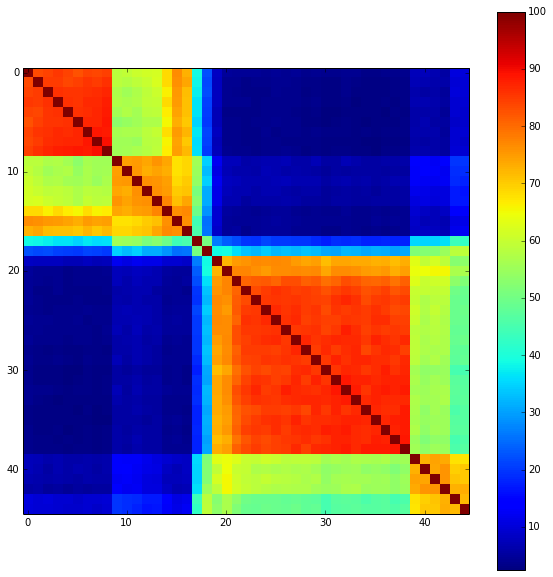

In [330]:
co_occurrence_matrix = np.divide(co_occurrence_matrix, 10)

# Reshape co-occurence_matrix by linkage
linkage = sch.linkage(co_occurrence_matrix)
dendrogram_right = sch.dendrogram(linkage, orientation='right')
dendrogram = sch.dendrogram(linkage)
idx1 = dendrogram_right['leaves']
idx2 = dendrogram['leaves']
co_occurrence_matrix = co_occurrence_matrix[idx1,:]
co_occurrence_matrix = co_occurrence_matrix[:,idx2]

# Co-occurrence matrix figure

plt.clf()
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
map=ax.imshow(co_occurrence_matrix, interpolation='nearest')
plt.colorbar(map)
plt.savefig('co-occurrence.pdf') # this line has to come before plt.show
plt.show()

# print(reshaped)
# reshaped.shape

# plt.clf()
# fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
# ax.imshow(reshaped, interpolation='nearest') 
# plt.savefig('co-occurrence.pdf') # this line has to come before plt.show
# plt.show()
